In [2]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from config import api_key
from datetime import datetime

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#create date for file name
date_file = datetime.now().strftime('%Y%m%d')

# Output log file (CSV)
output_data_file = "output_data/cities_log_" + str(date_file) + ".csv"
output_weather_file = "output_data/weather_log_" + str(date_file) + ".csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [5]:
# set up lists to hold reponse info
lat = []
name = []
cityID = []
temp = []
hum = []
cloud = []
wind = []

#set a while loop to verify that 500+ cities are in dataset
while len(lat) < 515:
    # Loop through the list of cities and perform a request for data on each
    # List for holding lat_lngs and cities
    lat_lngs = []
    cities = []
    #log file
    logCode =[]
    logPass = []

    # Create a set of random lat and lng combinations
    lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
    lat_lngs = zip(lats, lngs)

    # Identify nearest city for each lat, lng combination
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

        # If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)
    
    
    
    for city in cities:
        #try/except to remove cities without info
        try:
            params = {'appid' : api_key,'q' : city,'units' : 'metric'}
            response = requests.get(url, params=params).json()
            lat.append(response['coord']['lat'])
            name.append(response['name'])
            cityID.append(response['id'])
            temp.append(response['main']['temp'])
            hum.append(response['main']['humidity'])
            cloud.append(response['clouds']['all'])
            wind.append(response['wind']['speed'])
            logCode.append(response['id'])
            logPass.append("ACCEPTED")

        except:
            try:
                logCode.append(response['id'])
                logPass.append("Rejected")
            except:
                logCode.append("NA")
                logPass.append("Rejected")
                next
            next

len(lat)

584

In [6]:
#print length for quality assurance
print(len(name))
print(len(cityID))
print(len(name))
print(len(hum))
print(len(cloud))
print(len(wind))
print(len(logPass))

#calc date to timestamp data pull
date = datetime.now().strftime('%Y-%m-%d')
print(date)

584
584
584
584
584
584
652
2018-08-24


In [13]:
# create a data frame from cities, lat, temp, hum, cloud, wind
weather_dict = {
    "city": name,
    "cityID": cityID,
    "lat": lat,
    "temp": temp,
    "humidity": hum,
    "cldPct": cloud,
    "wndSpd": wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()
#Output weather datafile to 'output_data/cities_log.csv'
weather_data.to_csv(output_weather_file, sep=',', encoding='utf-8')
weather_data.head(60)

,city,cityID,lat,temp,humidity,cldPct,wndSpd
0,Moncton,6076211,46.10,25.00,57,20,6.20
1,New Norfolk,2155415,-42.78,7.00,81,0,4.60
2,Punta Arenas,3874787,-53.16,6.00,70,75,6.70
3,Dingle,1714733,11.00,23.29,96,36,2.11
4,Ballina,2966778,54.11,10.00,87,75,3.60
5,Mataura,6201424,-46.19,6.14,84,76,5.26
6,Iqaluit,5983720,63.75,6.00,81,75,5.70
7,Kapaa,5848280,22.08,27.04,97,90,10.80
8,Vila,3164565,45.18,25.00,65,0,1.00
9,Homer,5864145,59.64,13.89,77,1,4.10


In [14]:
#Generate log file by loading lists into DF and exporting to CSV
# create a data frame from cities, log code, logPass
log_dict = {
    "city": cities,
    "cityID": logCode,
    "Data_Added": logPass
}
log_data = pd.DataFrame(log_dict)
#Output log file to 'output_data/cities_log.csv'
log_data.to_csv(output_data_file, sep=',', encoding='utf-8')
log_data.head(60)

,city,cityID,Data_Added
0,moncton,6076211,ACCEPTED
1,new norfolk,2155415,ACCEPTED
2,punta arenas,3874787,ACCEPTED
3,taburi,NA,Rejected
4,dingle,1714733,ACCEPTED
5,ballina,2966778,ACCEPTED
6,mataura,6201424,ACCEPTED
7,iqaluit,5983720,ACCEPTED
8,kapaa,5848280,ACCEPTED
9,vila,3164565,ACCEPTED


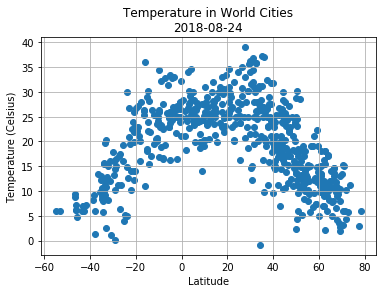

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities\n" + date)
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/TemperatureInWorldCities.png")

# Show plot
plt.show()

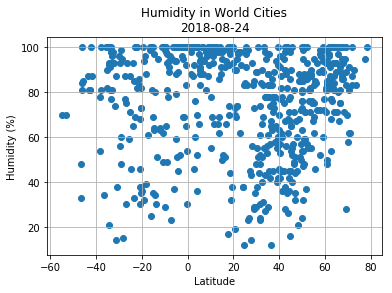

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities\n" + date)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/HumidityInWorldCities.png")

# Show plot
plt.show()

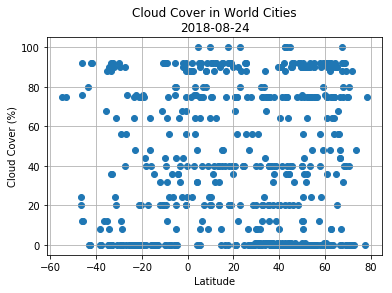

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["cldPct"], marker="o")

# Incorporate the other graph properties
plt.title("Cloud Cover in World Cities\n" + date)
plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CloudCoverInWorldCities.png")

# Show plot
plt.show()

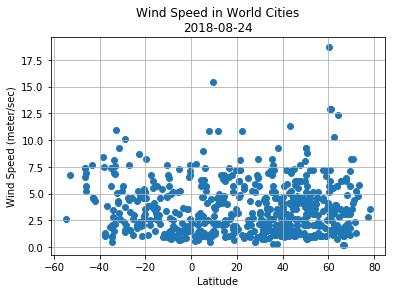

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["wndSpd"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities\n" + date)
plt.ylabel("Wind Speed (meter/sec)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WindSpeedInWorldCities.png")

# Show plot
plt.show()